Porjet P1

Vous êtes nouvel embauche chez CoolCorp, une startup qui spécialise
dans l'analyse des désastres maritimes.  Un nouveau client, White Star
Lines, se trouve face à un procès à travers le temps, affaire délicat.
Votre chef vous demande, en tant que seul data scientist chez
CoolCorp, d'analyser les données `*.csv`.  WSL a déjà engagé un expert
pour annoter une partie des données (`test.csv`) avec la survie ou pas
des passagers.

Le chef comprend que vous êtes nouveau, c'est pourquoi il vous laisse
une semaine complète pour cette analyse.

J'ouvre les fichiers train et test

In [6]:
import csv as csv 
import numpy as np
import pandas as pd

datap = pd.read_csv('train.csv', header=0)
testp = pd.read_csv('test.csv', header=0)

la ligne de commande suivante détail les premiéres élément de train.csv

In [7]:
datap.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


la ligne de commande suivante détail le type de chaque colonne de train.csv

In [8]:
datap.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

la ligne de commande suivante détail chaque colonne de train.csv plus précisement

In [10]:
datap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


la ligne de commande suivante détail statistiquement chaque colonne de train.csv (moyenne, mmin, max nombre,etc.)

In [11]:
datap.describe()

C:\Users\romain\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


la ligne de commande affiche la colonne age pour les dix premier

In [13]:
datap['Age'][0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

la ligne de commande affiche la colonne age pour les dix premier

In [14]:
datap.Age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

la ligne de commande affiche le type de colonne de age

In [15]:
type(datap.Age)

pandas.core.series.Series

In [16]:
#l'age moyenne
datap.Age.mean() 

29.69911764705882

In [17]:
#table avec seulement les colonnes sexe, Pclass et age
datap[['Sex', 'Pclass', 'Age']]

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0
5,male,3,NaN
6,male,1,54.0
7,male,3,2.0
8,female,3,27.0
9,female,2,14.0


In [18]:
#les passagers agés de plus de 60 ans
datap[datap['Age'] > 60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [19]:
#les passagers agés de plus de 60 ans selon le sex,le Pclass,ag et survivant
datap[datap['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0
252,male,1,62.0,0
275,female,1,63.0,1
280,male,3,65.0,0
326,male,3,61.0,0
438,male,1,64.0,0


In [20]:
#tous les passagers sans age selon le sex,le Pclass
datap[datap['Age'].isnull()][['Sex', 'Pclass', 'Age']]

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN
29,male,3,NaN
31,female,1,NaN
32,female,3,NaN
36,male,3,NaN
42,male,3,NaN


le code suivant, affiche le nombre d'homme par classe

In [21]:
for i in range(1,4):
    print(i, len(datap[ (datap['Sex'] == 'male') & (datap['Pclass'] == i) ]))

1 122
2 108
3 347


le code suivant affiche la répartition des passagers selon l'age

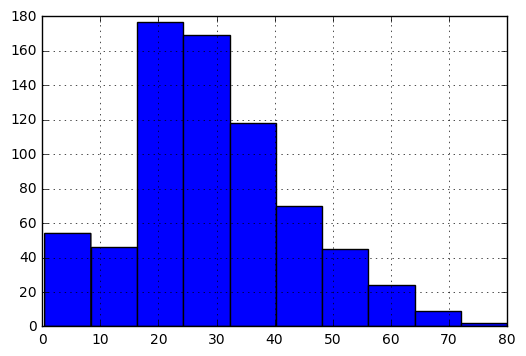

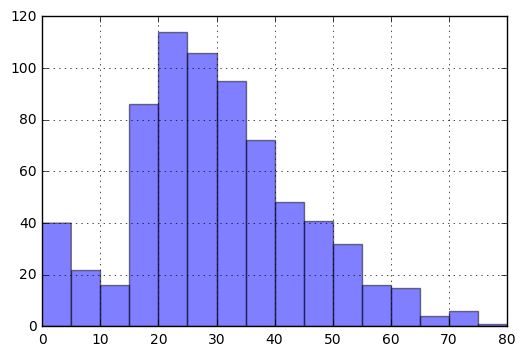

In [22]:
import pylab as P
datap['Age'].hist()
P.show()

datap['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
P.show()

<b>Nettayage des données</b> 

Nettayage des données ci-dessous pour permettre des analyses plus poussée et enlevée les données non approprié
exemple:
    -des valeurs à null.
    -des colonnes en type string qui peuvent être numérisé (le sexe par exemple).

Nettayage des données: remplacer le sexe par le numerisation en 0 et 1 (booléan)

In [23]:
# Ajouter une colonne :
datap['Gender'] = 4
testp['Gender'] = 4

# Peut-être avec des valeurs plus intéressantes :
datap['Gender'] = datap['Sex'].map( lambda x: x[0].upper() )
testp['Gender'] = testp['Sex'].map( lambda x: x[0].upper() )

# Ou binaire :
datap['Gender'] = datap['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
testp['Gender'] = testp['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

Nettayage des données: remplacer les ages null par l'age mediane selon le genre et la class.

In [24]:
#nettoyage de donnée de datap et testp
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = datap[(datap['Gender'] == i) & \
                              (datap['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = testp[(testp['Gender'] == i) & \
                              (testp['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

array([[ 41.,  24.,  22.],
       [ 42.,  28.,  24.]])

on ajoute les ages dans la nouvelle colonne AgeFill puis on affiche les dix premiére 

In [25]:
datap['AgeFill'] = datap['Age']

datap[ datap['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

testp['AgeFill'] = testp['Age']

testp[ testp['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
10,1,3,NaN,NaN
22,0,1,NaN,NaN
29,1,3,NaN,NaN
33,0,3,NaN,NaN
36,0,3,NaN,NaN
39,1,3,NaN,NaN
41,1,1,NaN,NaN
47,1,3,NaN,NaN
54,1,2,NaN,NaN
58,1,3,NaN,NaN


on ajoute les ages medians dans la nouvelle colonne AgeFill, où les ages sont null. Puis on affiche les dix premiéres modifications

In [26]:
# Et puis on le rempli :
for i in range(0, 2):
    for j in range(0, 3):
        datap.loc[ (datap.Age.isnull()) & (datap.Gender == i) & 
                (datap.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
datap[ datap['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

# Et puis on le rempli :
for i in range(0, 2):
    for j in range(0, 3):
        testp.loc[ (testp.Age.isnull()) & (testp.Gender == i) & 
                (testp.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
testp[ testp['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
10,1,3,NaN,24.0
22,0,1,NaN,41.0
29,1,3,NaN,24.0
33,0,3,NaN,22.0
36,0,3,NaN,22.0
39,1,3,NaN,24.0
41,1,1,NaN,42.0
47,1,3,NaN,24.0
54,1,2,NaN,28.0
58,1,3,NaN,24.0


on convertit la colonne en type integer.

In [27]:
datap['AgeIsNull'] = pd.isnull(datap.Age).astype(int)
testp['AgeIsNull'] = pd.isnull(testp.Age).astype(int)

on crée la colonne FamilySize (taille de la famille) et Age*Class

In [28]:
# parch is number of parents or children on board.
datap['FamilySize'] = datap['SibSp'] + datap['Parch']
testp['FamilySize'] = testp['SibSp'] + testp['Parch']

# Class affected survival.  Maybe age will, too.
# Who knows, maybe the product will be predictive, too.  Let's set it up.
datap['Age*Class'] = datap.AgeFill * datap.Pclass
testp['Age*Class'] = testp.AgeFill * testp.Pclass

<b>Analyse de l'influence de l'age selon le tarif</b> 

Ici, on affiche un tableau de l'age selon le tarif(fare)

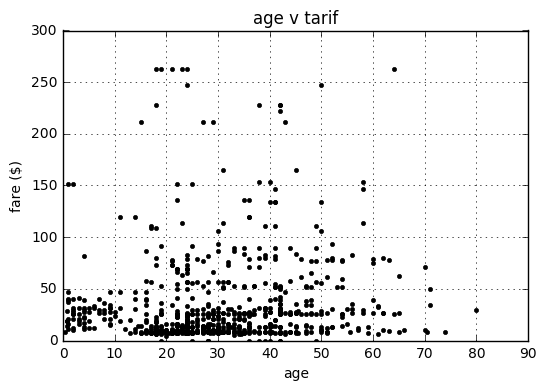

In [29]:
#graphique montrant le tarif selon l'age
import matplotlib.pyplot as plt

plt.figure()
plt.title('age v tarif')
plt.xlabel('age')
plt.ylabel('fare ($)')
plt.plot(datap['AgeFill'], datap['Fare'], 'k.')
plt.axis([0, 90, 0, 300])
plt.grid(True)
plt.show()


On peut voir qu'une grande partie des -10ans sont en-dessous de 50$. Pour la suite des ages, nous avons beaucoup en-dessous de 50$ , une minorité entre 50$ et 100$ et plus rarement au-dessus de 100$.
le premier constat est que l'age n'a pas vraiment d'influence sur le tarif aprés dix ans

ici nous avons une visualisation de la regression linaire de l'age par rapport au tarif pour pousser plus loin notre analyse.
on récupére les données 'age'(AgeFill) et 'tatif'(Fare) puis on prend un set de chaque. Par la suite nous appelons la fonction fit de l'objet linear Regression. Elle permet de crée un modéle linéaire des données qu'on lui donne. 
Par la suite nous pouvons afficher divers informations: coefficient, la somme carré des résidus et la variance.
Pour finir nous affichons une representation du modéle de linéaire.

Coefficients: 
 [[ 0.47804855]]
Residual sum of squares: 3042.38
Variance score: 0.05


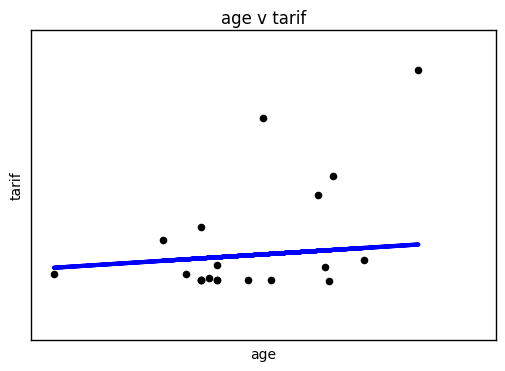

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model



# Split the data into training/testing sets
data_X_train = datap['AgeFill'].to_frame()[:-20]
data_X_test = testp['AgeFill'].to_frame()[-20:]

# Split the targets into training/testing sets
data_y_train = datap['Fare'].to_frame()[:-20]
data_y_test = testp['Fare'].to_frame()[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_X_train, data_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(data_X_test) - data_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(data_X_test, data_y_test))

# Plot outputs
plt.title('age v tarif')
plt.xlabel('age')
plt.ylabel('tarif')
plt.scatter(data_X_test, data_y_test,  color='black')
plt.plot(data_X_test, regr.predict(data_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

on peut voir grace là la regression linéaire qu'il y a quand même une légére hausse dans le tarif lorsque l'age devient plus élevé.

ci-dessous des predictions de tarif selon l'âge (grâce à la fonction predict())

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = datap['AgeFill'].to_frame()
y = datap['Fare'].to_frame()
model.fit(X, y)
print(u'le tarif pour 10 ans doit coûter {px:.2f} $'.format(
        px=model.predict([[10]])[0][0]))
print(u'le tarif pour 22 ans doit coûter {px:.2f} $'.format(
        px=model.predict([[22]])[0][0]))
print(u'le tarif pour 40 ans doit coûter {px:.2f} $'.format(
        px=model.predict([[40]])[0][0]))
print(u'le tarif pour 60 ans doit coûter {px:.2f} $'.format(
        px=model.predict([[60]])[0][0]))
print(u'le tarif pour 80 ans doit coûter {px:.2f} $'.format(
        px=model.predict([[80]])[0][0]))

le tarif pour 10 ans doit coûter 22.91 $
le tarif pour 22 ans doit coûter 28.75 $
le tarif pour 40 ans doit coûter 37.50 $
le tarif pour 60 ans doit coûter 47.23 $
le tarif pour 80 ans doit coûter 56.96 $


<b>Analyse de l'influence du tarif sur la survit</b> 

Ici, on affiche un tableau des tarif selon si survivants ou non

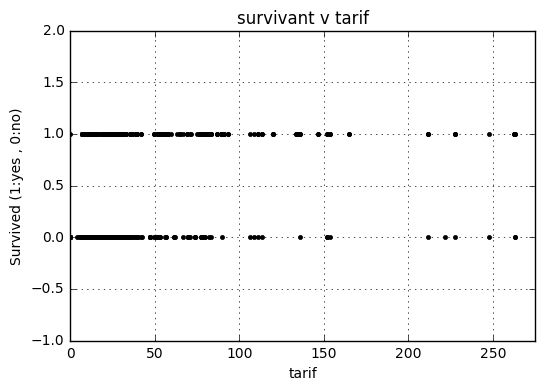

In [32]:
#graphique montrant le tarif selon survivant ou non

import matplotlib.pyplot as plt

plt.figure()
plt.title('survivant v tarif')
plt.xlabel('tarif')
plt.ylabel('Survived (1:yes , 0:no)')
plt.plot(datap['Fare'], datap['Survived'], 'k.')
plt.axis([0, 275, -1, 2])
plt.grid(True)
plt.show()

On remarque un léger avantage de survit si les passager ont payé un tarif élevé

ci-dessous des prediction de survit selon le tarif donné.

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = datap['Fare'].to_frame()
y = datap['Survived'].to_frame()
model.fit(X, y)
print(u'poourcentage d\'être survivant si on a payé 20: {px:.2f}'.format(
        px=model.predict([[20]])[0][0]))
print(u'poourcentage d\'être survivant si on a payé 50: {px:.2f}'.format(
        px=model.predict([[50]])[0][0]))
print(u'poourcentage d\'être survivant si on a payé 100: {px:.2f}'.format(
        px=model.predict([[100]])[0][0]))
print(u'poourcentage d\'être survivant si on a payé 150: {px:.2f}'.format(
        px=model.predict([[150]])[0][0]))
print(u'poourcentage d\'être survivant si on a payé 200: {px:.2f}'.format(
        px=model.predict([[200]])[0][0]))
print(u'poourcentage d\'être survivant si on a payé 250: {px:.2f}'.format(
        px=model.predict([[250]])[0][0]))

poourcentage d'être survivant si on a payé 20: 0.35
poourcentage d'être survivant si on a payé 50: 0.43
poourcentage d'être survivant si on a payé 100: 0.55
poourcentage d'être survivant si on a payé 150: 0.68
poourcentage d'être survivant si on a payé 200: 0.81
poourcentage d'être survivant si on a payé 250: 0.93


In [34]:
#tester le modèle de régression des residu, sans doute en modéle de courbe au vu du résultat précédant

<b>Analyse de l'influence de l'age selon le tarif en prenant en compte les personnes qui ont survecu</b> 

ci-dessous, affichage d'un graphique montrant le nombre de femme survivant et d'homme survivant selon l'age

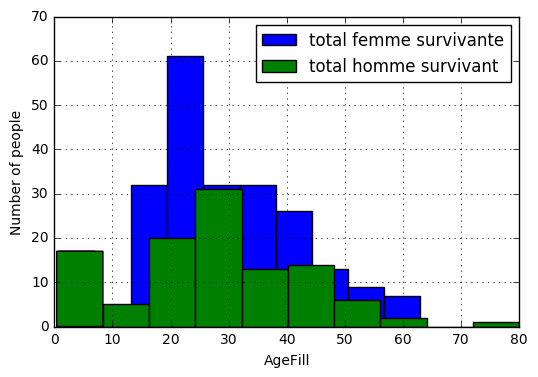

In [49]:
from matplotlib import pyplot

#variable de test
hommesurvivant=(datap['Survived']==1) & (datap['Sex']=='male')
femmesurvivante=(datap['Survived']==1) & (datap['Sex']=='female')

pyplot.hist(datap[femmesurvivante]['AgeFill'], label='total femme survivante')
pyplot.hist(datap[hommesurvivant]['AgeFill'], label='total homme survivant')
pyplot.xlabel('AgeFill')
pyplot.ylabel('Number of people')
pyplot.legend(loc='upper right')
pyplot.grid(True)
pyplot.show()

on peut remarquer qu'il y a beaucoup plus de femme survivante que les hommes et que l'age n'influence pas les données, les proportions sont à peu prés les même selon l'age

ci dessous, un test de regression avec le tarif selon l'age des femmes survivantes

Coefficients: 
 [[ 1.08539302]]
Residual sum of squares: 2749.81
Variance score: 0.14


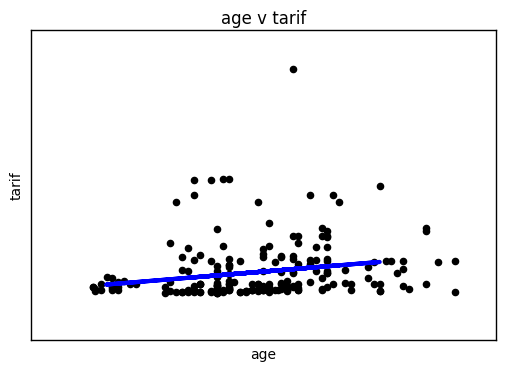

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model



hommesurvivantdatap=(datap['Survived']==1) & (datap['Sex']=='male')
femmesurvivantedatap=(datap['Survived']==1) & (datap['Sex']=='female')
#hommesurvivanttestp=(testp['Survived']==1) & (testp['Sex']=='male')
#femmesurvivantetestp=(testp['Survived']==1) & (testp['Sex']=='female')

# Split the data into training/testing sets
data_X_train = datap[femmesurvivantedatap]['AgeFill'].to_frame()[:-20]
#data_X_test = testp[femmesurvivantetestp]['AgeFill'].to_frame()[-20:]

# Split the targets into training/testing sets
data_y_train = datap[femmesurvivantedatap]['Fare'].to_frame()[:-20]
#data_y_test = testp['Fare'].to_frame()[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_X_train, data_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(data_X_test) - data_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(data_X_test, data_y_test))

# Plot outputs
plt.title('age v tarif')
plt.xlabel('age')
plt.ylabel('tarif')
plt.scatter(data_X_train, data_y_train,  color='black')
plt.plot(data_X_test, regr.predict(data_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

ci dessous, le même test de regression mais cette foici avec selon l'age des hommes survivantes

Coefficients: 
 [[ 0.33051954]]
Residual sum of squares: 3025.52
Variance score: 0.05


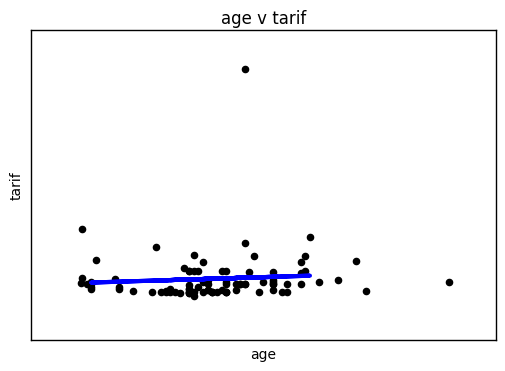

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model



hommesurvivantdatap=(datap['Survived']==1) & (datap['Sex']=='male')
femmesurvivantedatap=(datap['Survived']==1) & (datap['Sex']=='female')
#hommesurvivanttestp=(testp['Survived']==1) & (testp['Sex']=='male')
#femmesurvivantetestp=(testp['Survived']==1) & (testp['Sex']=='female')

# Split the data into training/testing sets
data_X_train = datap[hommesurvivantdatap]['AgeFill'].to_frame()[:-20]
#data_X_test = testp[femmesurvivantetestp]['AgeFill'].to_frame()[-20:]

# Split the targets into training/testing sets
data_y_train = datap[hommesurvivantdatap]['Fare'].to_frame()[:-20]
#data_y_test = testp['Fare'].to_frame()[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(data_X_train, data_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(data_X_test) - data_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(data_X_test, data_y_test))

# Plot outputs
plt.title('age v tarif')
plt.xlabel('age')
plt.ylabel('tarif')
plt.scatter(data_X_train, data_y_train,  color='black')
plt.plot(data_X_test, regr.predict(data_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Avec ces deux regressions , on peut observer plusieurs choses:
    -les hommes survivants ont une répartiton égale des tarifs selon l'age
    -les femmes survivantes ont un tarif qui augmente selon l'age
    
On peut en déduire que les femmes survivantes ont influencé ma premiére regression linéaire (tarif sur l'age) qui se ressemble beaucoup, alors que pour les hommes survivants nous avons une répartition plus égale. 
On peut conclure que le tarif influence la chance de survit plus chez les femmes que chez les hommes